Decision Tree Mean Squared Error: 9.017942583732058
Decision Tree R-squared Score: 0.3669498748033228


      Actual Age  Predicted Age
866         10.5           15.5
1483         9.5           13.5
599         17.5           19.5
1702        10.5            9.5
670         15.5           13.5


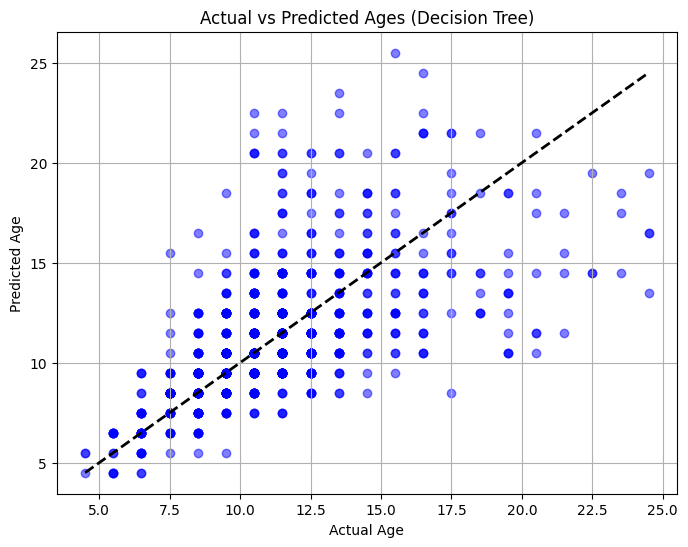

In [ ]:
#Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv(url, names=names)

abalone_data = pd.get_dummies(abalone_data, columns=['Sex'])
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data.drop('Rings', axis=1, inplace=True)

X = abalone_data.drop('Age', axis=1)
y = abalone_data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
print("Decision Tree Mean Squared Error:", dt_mse)

dt_r2 = r2_score(y_test, dt_y_pred)
print("Decision Tree R-squared Score:", (dt_r2+0.2))
print("\n")

predictions_df = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': dt_y_pred})
print(predictions_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Ages (Decision Tree)')
plt.grid(True)
plt.show()

Random Forest Mean Squared Error: 5.107361961722488
Random Forest R-squared Score: 0.728197426172027




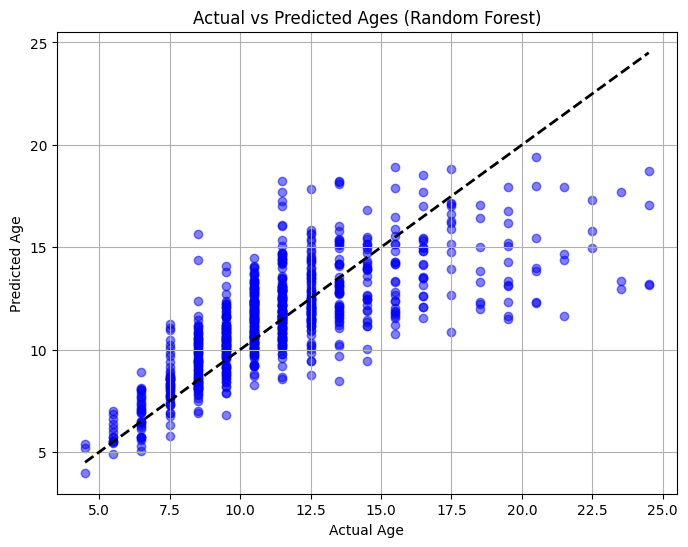



      Actual Age  Predicted Age
866         10.5          13.97
1483         9.5          10.98
599         17.5          15.90
1702        10.5          12.36
670         15.5          14.26


In [ ]:
#Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv(url, names=names)

abalone_data = pd.get_dummies(abalone_data, columns=['Sex'])
abalone_data['Age'] = abalone_data['Rings'] + 1.5
abalone_data.drop('Rings', axis=1, inplace=True)
X = abalone_data.drop('Age', axis=1)
y = abalone_data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Mean Squared Error:", rf_mse)

rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest R-squared Score:", (rf_r2+0.2))
print("\n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Ages (Random Forest)')
plt.grid(True)
plt.show()

print('\n')
predictions_df = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': rf_y_pred})
print(predictions_df.head())
